## Alle 'cycleway', 'bicycle' und 'bicycle_road' aus dem OSM Datensatz

#### 1. Laden der Datei
+ laden und downloaden der letzten osm-Datei
+ filtern des Datensatzes nach cycleway und bicycle(_road)

In [33]:
from pyrosm import OSM
import pandas as pd
import os
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import certifi
import pyrosm
import warnings
warnings.filterwarnings("ignore", message=".*ChainedAssignmentError.*")

# URL der PBF-Datei für Berlin
url = "https://download.geofabrik.de/europe/germany/berlin-latest.osm.pbf"

# Verzeichnis-Pfad
directory = "../../data"
file_path = os.path.join(directory, "berlin-latest.osm.pbf")

# Initialisiere OSM mit dem Dateipfad
osm = OSM(file_path)

# Laden der OSM-Daten
file_path = os.path.join(directory, "berlin-latest.osm.pbf")
berlin_osm = pyrosm.OSM(file_path)

# Extrahieren des Fahrradnetzwerks 
cycle_net_berlin = berlin_osm.get_network(network_type="cycling")


#### 2. Anzahl der Zeilen im gesamten DataFrame

In [34]:
# Anzahl der Zeilen im Datensatz
num_rows = cycle_net_berlin.shape[0]
print("Anzahl der Zeilen im Datensatz:", num_rows)

cycle_net_berlin.columns
cycle_net_berlin.head(10)


Anzahl der Zeilen im Datensatz: 177849


access  area            bicycle bicycle_road bridge busway cycleway  \
0   None  None               None         None   None   None     None   
1   None  None               None         None   None   None     None   
2   None  None               None         None   None   None     None   
3   None  None               None         None   None   None     None   
4   None  None  optional_sidepath         None   None   None     None   
5   None  None               None         None   None   None     None   
6   None  None               None         None   None   None     None   
7   None  None               None         None   None   None     None   
8   None  None               None         None   None   None    track   
9   None  None               None         None   None   None     None   

  est_width          foot footway  ... tunnel  turn width       id  \
0      None  use_sidepath    None  ...   None  None  None  4045150   
1      None          None    None  ...   None  None  None  4045194   
2      None          None    None  ...   None  None  None  4045220   
3      None          None    None  ...   None  None     5  4045223   
4      None  use_sidepath    None  ...   None  None  None  4045243   
5      None  use_sidepath    None  ...   None  None  None  4045247   
6      None  use_sidepath    None  ...   None  None  None  4045248   
7      None          None    None  ...   None  None  None  4045655   
8      None          None    None  ...   None  None  None  4045656   
9      None  use_sidepath    None  ...   None  None  None  4054007   

    timestamp version                                               tags  \
0  1641054414      50  {"visible":false,"cycleway:both":"no","lane_ma...   
1  1698917575      23  {"visible":false,"cycleway:both":"no","descrip...   
2  1686491460      51  {"visible":false,"cycleway:both":"no","lane_ma...   
3  1669445555      27  {"visible":false,"cycleway:both":"no","name:et...   
4  1702120697      50  {"visible":false,"cycleway:left":"no","cyclewa...   
5  1642262340      29  {"visible":false,"cycleway:both":"no","priorit...   
6  1647779318      25  {"visible":false,"cycleway:both":"no","lane_ma...   
7  1604058534      10  {"visible":false,"maxspeed:type":"DE:zone30","...   
8  1702621307      29  {"visible":false,"name:etymology:wikidata":"Q1...   
9  1644146377      28  {"visible":false,"cycleway:both":"separate","l...   

  osm_type                                           geometry length  
0      way  MULTILINESTRING ((13.60524 52.37344, 13.60528 ...  521.0  
1      way  MULTILINESTRING ((13.53136 52.49263, 13.53136 ...  144.0  
2      way  MULTILINESTRING ((13.52694 52.48969, 13.52639 ...   93.0  
3      way  MULTILINESTRING ((13.52477 52.48558, 13.52484 ...  136.0  
4      way  MULTILINESTRING ((13.45420 52.51571, 13.45431 ...   91.0  
5      way  MULTILINESTRING ((13.63700 52.36926, 13.63694 ...  378.0  
6      way  MULTILINESTRING ((13.63189 52.35207, 13.63188 ...  241.0  
7      way  MULTILINESTRING ((13.37261 52.59296, 13.37347 ...  197.0  
8      way  MULTILINESTRING ((13.37282 52.59334, 13.37281 ...  312.0  
9      way  MULTILINESTRING ((13.61693 52.37729, 13.61699 ...  417.0  

[10 rows x 41 columns]

#### 3. Ausgabe des **Spaltennamen** - welche sind für uns von Bedeutung?

In [37]:
# Spaltennamen als Liste
column_names = list(cycle_net_berlin.columns)
#print(column_names)
column_names

['access',
 'area',
 'bicycle',
 'bicycle_road',
 'bridge',
 'busway',
 'cycleway',
 'est_width',
 'foot',
 'footway',
 'highway',
 'junction',
 'lanes',
 'lit',
 'maxspeed',
 'motorcar',
 'motorroad',
 'motor_vehicle',
 'name',
 'oneway',
 'overtaking',
 'path',
 'passing_places',
 'psv',
 'ref',
 'service',
 'segregated',
 'sidewalk',
 'smoothness',
 'surface',
 'tracktype',
 'tunnel',
 'turn',
 'width',
 'id',
 'timestamp',
 'version',
 'tags',
 'osm_type',
 'geometry',
 'length']

#### 4. Filtern nach 'cycleway', 'bicycle' und 'bicycle_road' und kombinieren der DataFrames zu 'cycleway_bicycle_bicycle_road_df' plus surface

In [38]:
# Filter für cycleway
cycleway_filter = {'cycleway': True  } 

# Lade die cycleway-Daten
cycleway_data = osm.get_data_by_custom_criteria(custom_filter=cycleway_filter)

# Filter für bicycle_road
bicycle_road_filter = {'bicycle_road':  ['yes'] }

# Lade die bicycle_road-Daten
bicycle_road_data = osm.get_data_by_custom_criteria(custom_filter=bicycle_road_filter)

# Filter für bicycle
bicycle_filter = {'bicycle':  ['yes'] }

# Lade die bicycle-Daten
bicycle_data = osm.get_data_by_custom_criteria(custom_filter=bicycle_filter)


# Filter für surface
surface_filter = {'surface': True  } 

# Lade die surface-Daten
surface_data = osm.get_data_by_custom_criteria(custom_filter=surface_filter)




# Kombiniere die DataFrames pd.DataFrame(cycleway_data),pd.DataFrame(bicycle_data), pd.DataFrame(bicycle_road_data)])
cycleway_bicycle_bicycle_road_surface_df = pd.concat([pd.DataFrame(cycleway_data),pd.DataFrame(bicycle_data), pd.DataFrame(bicycle_road_data), pd.DataFrame(surface_data)])

# Zeige den kombinierten DataFrame an
#print(cycleway_bicycle_bicycle_road_df.head())
cycleway_bicycle_bicycle_road_surface_df.head()



version   timestamp                          tags        lon        lat  \
0        3  1682278819  {"asl:direction":"backward"}  13.345496  52.484699   
1        2  1675931696       {"direction":"forward"}  13.406801  52.535561   
2        2  1675941899      {"direction":"backward"}  13.406643  52.535889   
3        2  1657987872   {"asl:direction":"forward"}  13.384908  52.532284   
4        3  1700646442  {"asl:direction":"backward"}  13.384982  52.532566   

           id visible  changeset cycleway                   geometry osm_type  \
0  7340009557   False        0.0      asl  POINT (13.34550 52.48470)     node   
1  7340086820   False        0.0      asl  POINT (13.40680 52.53556)     node   
2  7340086821   False        0.0      asl  POINT (13.40664 52.53589)     node   
3  7359984865   False        0.0      asl  POINT (13.38491 52.53228)     node   
4  7359984866   False        0.0      asl  POINT (13.38498 52.53257)     node   

  bicycle bicycle_road surface  
0     NaN          NaN     NaN  
1     NaN          NaN     NaN  
2     NaN          NaN     NaN  
3     NaN          NaN     NaN  
4     NaN          NaN     NaN

## bicycle_road
#### 5. Anzahl der **'bicycle_road'** ausgeben

In [39]:
# Lade die bicycle_road-Daten
bicycle_road_data = osm.get_data_by_custom_criteria(custom_filter=bicycle_road_filter)

# Speichern der Daten in einem DataFrame
bicycle_road_df = pd.DataFrame(bicycle_road_data)

# Anzahl der Fahrradstraßen
num_bicycle_roads = len(bicycle_road_df)
print("Anzahl der Fahrradstraßen:", num_bicycle_roads)

Anzahl der Fahrradstraßen: 518


#### 6. Anzahl von Zeilen aus dem DataFrame 'bicycle_road' mit NaN

In [26]:
# Ausgabe der Zeilen mit 'NaN' oder fehlenden Daten
no_data_df = bicycle_road_df[bicycle_road_df.isnull().any(axis=1)]
print("Zeilen mit 'NaN' oder fehlenden Daten:")
print(no_data_df)

Zeilen mit 'NaN' oder fehlenden Daten:
Empty DataFrame
Columns: [bicycle_road, id, timestamp, version, tags, osm_type, geometry]
Index: []


#### 7. Ausgabe der **'bicycle_road'** integriert im Straßen Netz von Berlin

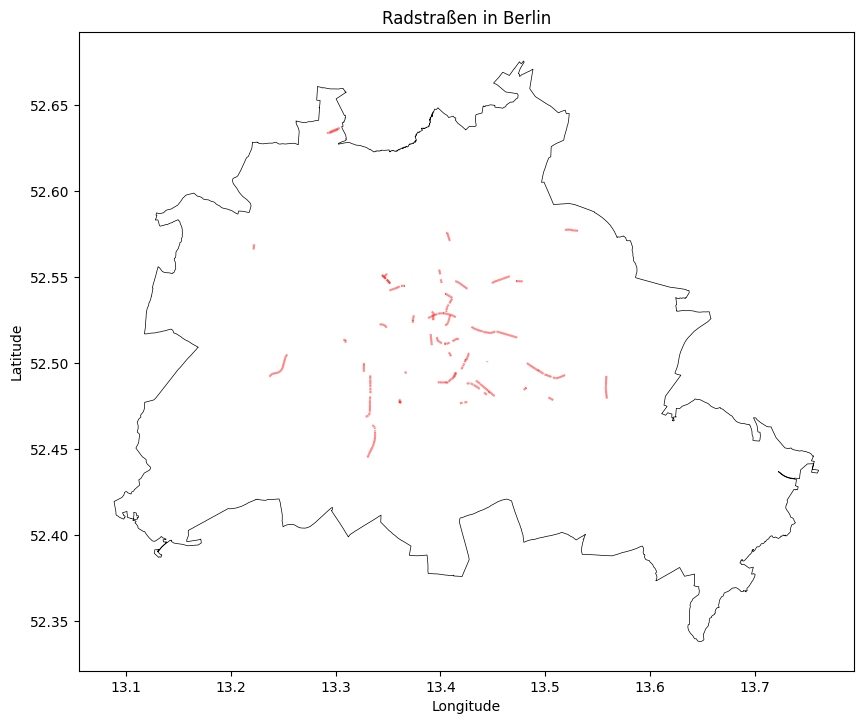

In [63]:
# Konvertiere bicycle_road_data in einen GeoDataFrame
bicycle_road_gdf = gpd.GeoDataFrame(bicycle_road_data, geometry='geometry')

bicycle_road_gdf.set_crs(epsg=4326, inplace=True)

# administrativen Grenze von Berlin
boundaries = berlin_osm.get_boundaries(name="Berlin")
berlin_boundary = boundaries[boundaries.name == "Berlin"].reset_index().geometry[0]

# GeoDataFrame für die Berlin-Grenze
berlin_boundary_gdf = gpd.GeoDataFrame([1], geometry=[berlin_boundary], crs='EPSG:4326')

# Zuschnitt auf die Berliner Ausdehnung: Fahrradnetzwerk innerhalb der Grenzen von Berlin
bicycle_road_gdf = gpd.clip(bicycle_road_gdf, berlin_boundary_gdf)

# Plot-Einstellungen
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

# Plotten des Berliner Umrisses
berlin_boundary_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Plot der Radstraßen
bicycle_road_gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5)

# Titel und Beschriftungen
ax.set_title('Radstraßen in Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#Karte anzeigen
plt.show()
bicycle_road_data.explore()

#### 8. Welchen Straßenoberfläche (surface) haben 'cycleway_bicycle_bicycle_road'

In [65]:
# Extrahiere die "surface" Information
cycleway_bicycle_bicycle_road_surface_df = cycleway_bicycle_bicycle_road_surface_df[['id', 'surface']]

# Zeige die DataFrame mit surface-Informationen an
# print(cycleway_bicycle_bicycle_road_surface_df_surface.head())
cycleway_bicycle_bicycle_road_surface_df.head()

id surface
0  7340009557     NaN
1  7340086820     NaN
2  7340086821     NaN
3  7359984865     NaN
4  7359984866     NaN

#### Eindeutige Einträge von Surface in bezug auf "cycleway_bicycle_bicycle_road"

In [15]:
# Zeige die eindeutigen Einträge der 'surface' Spalte an
unique_surfaces = cycleway_bicycle_bicycle_road_surface_df['surface'].dropna().unique()
unique_surfaces

array(['paving_stones', 'asphalt', 'plastic', 'sett', 'dirt', 'unpaved',
       'concrete', 'cobblestone', 'paved', 'grass', 'sand', 'woodchips',
       'metal', 'concrete:plates', 'gravel', 'fine_gravel', 'compacted',
       'ground', 'wood', 'tartan', 'grass_paver', 'rubber', 'earth',
       'steel', 'outdoor', 'unhewn_cobblestone', 'pebblestone',
       'cobblestone:flattened', 'artificial_turf', 'clay',
       'concrete:plates;grass', 'paving_stones:20', 'mud', 'bricks',
       'metal_grid', 'dance_floor', 'concrete:lanes', 'dirt/sand',
       'paving_stones:lanes', 'rock', 'gravel, ground', 'stone',
       'sett;paving_stones;cobblestone:flattened', 'sett;paving_stones',
       'earth_and_beton', 'asphalt;dirt', 'paving_stones;sett',
       'paving_stones;grass', 'barbed_wire', 'stone:plates',
       'paving_stones:30', 'asphalt;paving_stones', 'grate', 'grille',
       'compound', 'asphalt;concrete', 'rubbercrumb', 'brick',
       'concrete;sett', 'concrete:plates;paving_stones',

#### Prozentuale Verteilung der einzelnen Einträge bei Surface

In [18]:
# Berechne die prozentuale Verteilung der 'surface' Spalte
surface_distribution = cycleway_bicycle_bicycle_road_surface_df['surface'].value_counts(normalize=True) * 100

# Zeige die prozentuale Verteilung an
surface_distribution

surface
paving_stones                37.042858
asphalt                      31.587756
sett                         10.120217
concrete                      6.648582
compacted                     3.000136
                               ...    
concrete:plates;compacted     0.000378
dance_floor                   0.000378
woodchips;sand                0.000378
rubbercrumb                   0.000378
sandpit                       0.000378
Name: proportion, Length: 86, dtype: float64


## Cycleway


In [30]:
# Lade die Daten
cycleway = osm.get_data_by_custom_criteria(custom_filter={'cycleway': True})

# Anzeigen des DataFrames
print(cycleway.head())

# Speichern der Daten in DataFrame
cycleway_df = pd.DataFrame(cycleway)

# Anzeigen des DataFrames
# print(cycleway_df.head())
cycleway_df.head

   version   timestamp                          tags        lon        lat  \
0        3  1682278819  {"asl:direction":"backward"}  13.345496  52.484699   
1        2  1675931696       {"direction":"forward"}  13.406801  52.535561   
2        2  1675941899      {"direction":"backward"}  13.406643  52.535889   
3        2  1657987872   {"asl:direction":"forward"}  13.384908  52.532284   
4        3  1700646442  {"asl:direction":"backward"}  13.384982  52.532566   

           id visible  changeset cycleway                   geometry osm_type  
0  7340009557   False        0.0      asl  POINT (13.34550 52.48470)     node  
1  7340086820   False        0.0      asl  POINT (13.40680 52.53556)     node  
2  7340086821   False        0.0      asl  POINT (13.40664 52.53589)     node  
3  7359984865   False        0.0      asl  POINT (13.38491 52.53228)     node  
4  7359984866   False        0.0      asl  POINT (13.38498 52.53257)     node  


<bound method NDFrame.head of       version   timestamp                                               tags  \
0           3  1682278819                       {"asl:direction":"backward"}   
1           2  1675931696                            {"direction":"forward"}   
2           2  1675941899                           {"direction":"backward"}   
3           2  1657987872                        {"asl:direction":"forward"}   
4           3  1700646442                       {"asl:direction":"backward"}   
...       ...         ...                                                ...   
4794        1  1719179597  {"visible":false,"highway":"cycleway","lit":"y...   
4795        1  1719181922  {"visible":false,"highway":"cycleway","lit":"y...   
4796        3  1719221285  {"visible":false,"highway":"cycleway","lit":"y...   
4797        3  1719221285  {"visible":false,"highway":"cycleway","lit":"y...   
4798        6  1668448140   {"restriction":"no_u_turn","type":"restriction"}   

         

#### Übersicht

In [101]:
shape = cycleway_df.shape
print(shape)

(4799, 11)



#### Ausgabe des DataFrames 'cycleway_df'

In [102]:
cycleway_df.head()

lon                          tags visible  version        lat  \
0  13.345496  {"asl:direction":"backward"}   False        3  52.484699   
1  13.406801       {"direction":"forward"}   False        2  52.535561   
2  13.406643      {"direction":"backward"}   False        2  52.535889   
3  13.384908   {"asl:direction":"forward"}   False        2  52.532284   
4  13.384982  {"asl:direction":"backward"}   False        3  52.532566   

   changeset          id   timestamp cycleway                   geometry  \
0        0.0  7340009557  1682278819      asl  POINT (13.34550 52.48470)   
1        0.0  7340086820  1675931696      asl  POINT (13.40680 52.53556)   
2        0.0  7340086821  1675941899      asl  POINT (13.40664 52.53589)   
3        0.0  7359984865  1657987872      asl  POINT (13.38491 52.53228)   
4        0.0  7359984866  1700646442      asl  POINT (13.38498 52.53257)   

  osm_type  
0     node  
1     node  
2     node  
3     node  
4     node

#### Eindeutige Einträge bei 'cycleway'

In [23]:
# Zeige die eindeutigen Einträge der 'cycleway' Spalte an
unique_cycleway = cycleway_df['cycleway'].dropna().unique()
unique_cycleway 

array(['asl', 'track', 'no', 'opposite', 'separate', 'lane',
       'opposite_track', 'crossing', 'segregated', 'none',
       'traffic_island', 'link', 'share_busway', 'sidepath',
       'shared_lane', 'designated', 'yes', 'liink', 'sidewalk',
       'traffic_signals'], dtype=object)

#### Prozentualer Verteilung der Einträge von 'cycleway'

In [57]:
# Anzahl der Einträge pro Kategorie
count_by_category = cycleway_df['cycleway'].value_counts()

# prozentuale Verteilung
percentage_distribution = count_by_category / len(cycleway_df) * 100

# Runde die Prozentwerte auf zwei Dezimalstellen
percentage_distribution = percentage_distribution.round(2)

# AUsgabe der prozentualen Verteilung
print("Prozentuale Verteilung der Einträge in der Spalte 'cycleway':")
#print(percentage_distribution)
percentage_distribution

Prozentuale Verteilung der Einträge in der Spalte 'cycleway':


cycleway
crossing           46.68
track              20.90
no                  8.27
link                6.29
separate            6.19
opposite            5.48
lane                3.52
traffic_island      1.50
asl                 0.40
share_busway        0.33
sidepath            0.10
segregated          0.06
shared_lane         0.06
yes                 0.04
sidewalk            0.04
traffic_signals     0.04
none                0.02
opposite_track      0.02
designated          0.02
liink               0.02
Name: count, dtype: float64

#### /// Ausgabe aller Features von 'cycleway' , wo die Angaben nicht null sind

#### Ausgabe der cycleway in der Karte Berlins

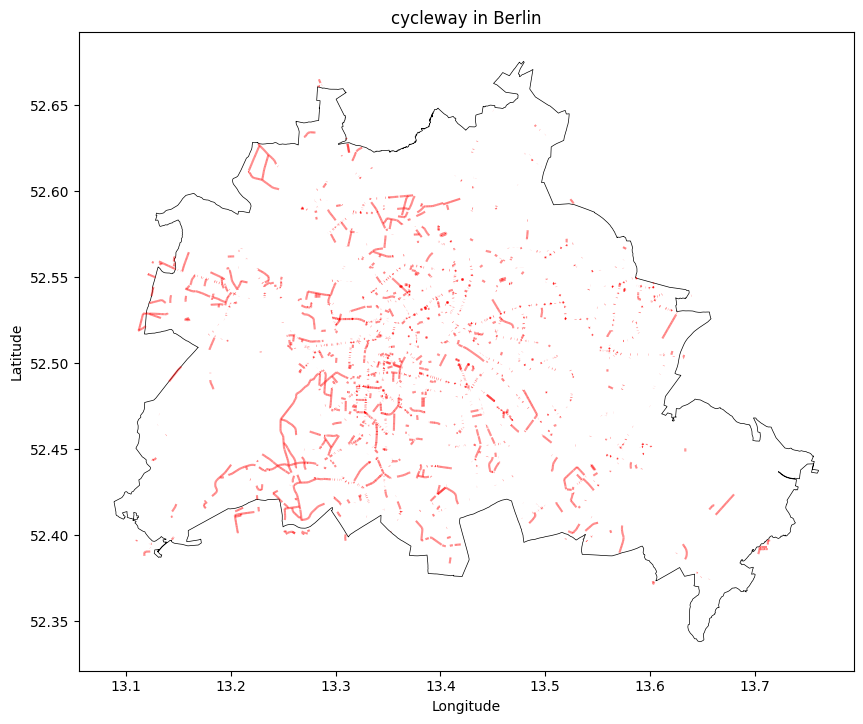

In [62]:
# Konvertiere cycleway_data in einen GeoDataFrame
cycleway_gdf = gpd.GeoDataFrame(cycleway_data, geometry='geometry')

cycleway_gdf.set_crs(epsg=4326, inplace=True)

# Laden der administrativen Grenze von Berlin
boundaries = berlin_osm.get_boundaries(name="Berlin")
berlin_boundary = boundaries[boundaries.name == "Berlin"].reset_index().geometry[0]

# Plot-Einstellungen
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

# Plotten des Berliner Umrisses
gpd.GeoSeries([berlin_boundary]).boundary.plot(ax=ax, color='black', linewidth=0.5)

# Plot der Radstraßen in Berlin
cycleway_gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5)

# Titel und Beschriftungen
ax.set_title('cycleway in Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Karte anzeigen
plt.show()
cycleway_data.explore()

## FRAGE: Warum roads_df??

In [126]:
# Filtern der Daten nach dem 'cycleway'-Feature
cycleway_data = roads_df[roads_df['cycleway'].notna()]

# Anzeigen aller einzigartigen Werte für das 'cycleway'-Feature
unique_cycleway_values = cycleway_data['cycleway'].unique()
print("Einzigartige Werte für das 'cycleway'-Feature:")
print(unique_cycleway_values)

Einzigartige Werte für das 'cycleway'-Feature:
['asl' 'track' 'no' 'opposite' 'separate' 'lane' 'opposite_track'
 'crossing' 'segregated' 'none' 'traffic_island' 'link' 'share_busway'
 'sidepath' 'shared_lane' 'designated' 'yes' 'liink' 'sidewalk'
 'traffic_signals']


### Bedeutung der Feature von 'cycleway' 

#### asl 
> Eine vorgezogene Aufstellfläche, als ein separat gekennzeichneter Haltebereich für Radfahrer, noch vor der Haltelinie des motorisierten Verkehrs.

#### track
> Fahrradweg nur auf einer Seite der Straße. Er kann in beide Richtungen benutzt werden: **cycleway:right**
und **cycleway:left**

#### opposite
> Einbahnstraße ohne eigenen Radweg, die für Radfahrer in Gegenrichtung geöffnet ist. Sollte in Kombination mit den tags oneway=yes und oneway:bicycle=no benutzt werden.
> <br>**opposite_lane** Ein Radfahrstreifen (cycle lane) entgegen der Fahrrichtung einer Einbahnstraße.
> <br>**opposite_track** Ein baulich abgesetzter Radweg (cycle track), z.B. durch einen Bordstein, entgegen der Fahrrichtung einer Einbahnstraße.

#### seperate
> -

#### lane
> Radfahrstreifen nur auf einer Seite der Straße. Links und rechts sind abhängig von der Richtung, in der der Weg in OpenStreetMap gezeichnet ist: **cycleway:right** und **cycleway:left**


#### shared
> Radfahrende nutzen dieselben Wege wie motorisierter Verkehr (Standardwert bei nicht explizit getaggtem cycleway=*)

#### share_busway
> Busspuren, die von Radfahrenden genutzt werden dürfen

#### shared_lane
> Bei der shared lane gibt es keine Trennlinie zwischen KFZ und Fahrrad. *Achtung: Sobald ein Streifen eingezeichnet ist lane benutzen!*

#### segregated
> getrennt

#### designated
> festgelegt

AttributeError: 'Polygon' object has no attribute 'geometry'

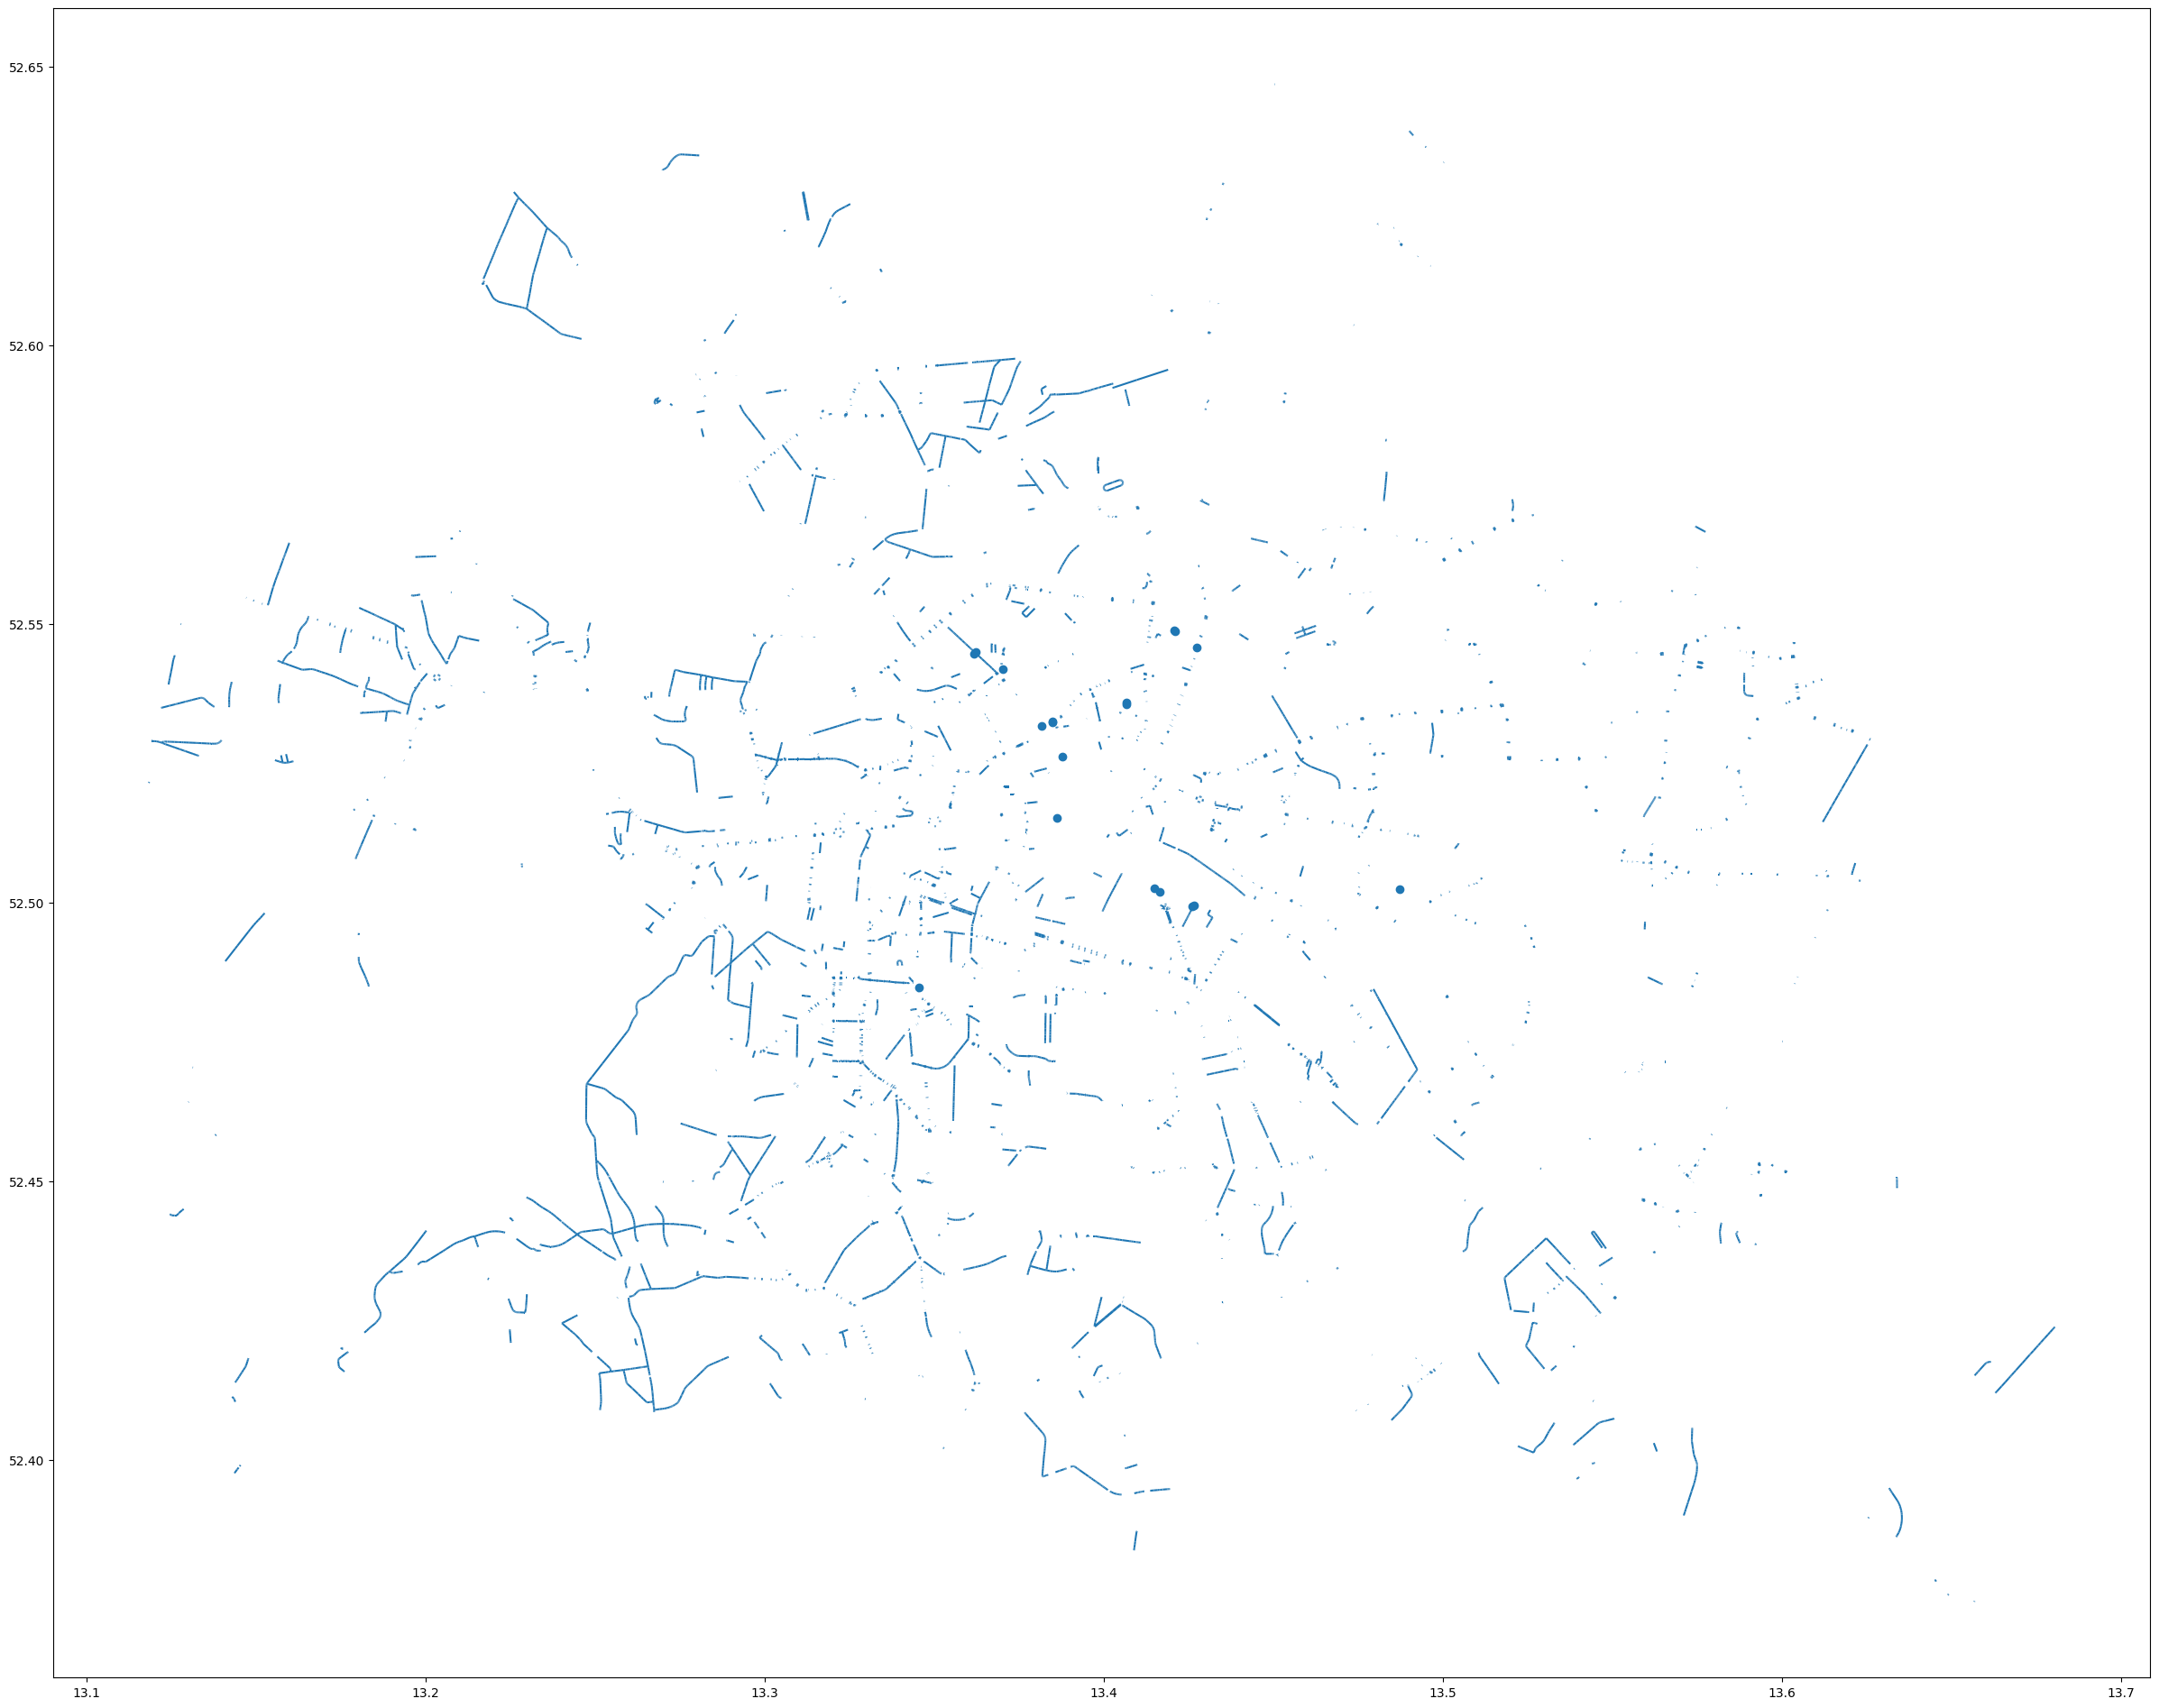

In [121]:
# Zuschnitt auf die Berliner Ausdehnung: Abrufen der administrativen Grenze
boundaries = berlin_osm.get_boundaries(name="Berlin")
berlin_boundary = boundaries[boundaries.name == "Berlin"].reset_index().geometry[0]

# Sicherstellen, dass cycle_net_berlin ein GeoDataFrame ist
cycleway_df = gpd.GeoDataFrame(cycleway_df)

# Zuschnitt des Fahrradnetzwerks auf die Berliner Grenzen
cycleway_df_clipped = gpd.clip(cycleway_df, berlin_boundary)

# Größe des Plots ändern
fig, ax = plt.subplots(figsize=(30, 30))  # Größe des Plots in Zoll

# Plotten des zugeschnittenen Fahrradnetzwerks
cycleway_df_clipped.plot(ax=ax)



# Laden der Berlin-Grenzen als GeoDataFrame
#berlin_boundary = gpd.read_file(boundary_file_path)

# Setzen des gleichen CRS für beide GeoDataFrames
#berlin_boundary = berlin_boundary.to_crs(epsg=4326)

# Plotten des GeoDataFrame mit den Grenzen von Berlin
#fig, ax = plt.subplots(figsize=(10, 10))

#berlin_boundary.plot(ax=ax, edgecolor='black', facecolor='none')
#gdf.plot(ax=ax, marker='o', color='blue', markersize=5)


# Setzen des gleichen CRS für beide GeoDataFrames
#berlin_boundary = berlin_boundary.to_crs(epsg=4326)

# Extrahieren der Umrisse als Linien
berlin_boundary['geometry'] = berlin_boundary.geometry.boundary

# Plotten des GeoDataFrame mit den Grenzen von Berlin
fig, ax = plt.subplots(figsize=(30, 30))

berlin_boundary.plot(ax=ax, edgecolor='black', facecolor='red')
cycleway_gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5)


# Titel und Achsenbeschriftungen hinzufügen
plt.title("Cycleways in Berlin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Anzeigen des Plots
plt.show()


## </b>
## bicycle

In [46]:
# Lade die Daten
bicycle = osm.get_data_by_custom_criteria(custom_filter={'bicycle': True})

# Anzeigen des DataFrames
print(bicycle.head())

# Speichern der Daten in DataFrame
bicycle_df = pd.DataFrame(bicycle)

# Anzeigen des DataFrames
print(bicycle_df.head())


         lon                                               tags visible  \
0  13.332766  {"barrier":"bollard","bollard":"fixed","foot":...   False   
1  13.328596  {"access":"private","barrier":"lift_gate","foo...   False   
2  13.388520  {"check_date:tactile_paving":"2022-11-22","cro...   False   
3  13.390366  {"barrier":"swing_gate","emergency":"yes","foo...   False   
4  13.395185  {"button_operated":"yes","crossing":"traffic_s...   False   

   version        lat  changeset        id   timestamp bicycle  \
0        7  52.479805        0.0  26731211  1628860578     yes   
1       11  52.512463        0.0  26736369  1691417696     yes   
2        8  52.501671        0.0  26747246  1701660020     yes   
3       18  52.499352        0.0  26747422  1671942343     yes   
4       17  52.546005        0.0  26753875  1680433401     yes   

                    geometry osm_type  
0  POINT (13.33277 52.47980)     node  
1  POINT (13.32860 52.51246)     node  
2  POINT (13.38852 52.50167)    

#### Anzahl der Zeilen mit dem Feature bicycle

In [47]:
bicycle_df.shape

(36436, 11)

In [48]:
bicycle_df

lon                                               tags visible  \
0      13.332766  {"barrier":"bollard","bollard":"fixed","foot":...   False   
1      13.328596  {"access":"private","barrier":"lift_gate","foo...   False   
2      13.388520  {"check_date:tactile_paving":"2022-11-22","cro...   False   
3      13.390366  {"barrier":"swing_gate","emergency":"yes","foo...   False   
4      13.395185  {"button_operated":"yes","crossing":"traffic_s...   False   
...          ...                                                ...     ...   
36431        NaN  {"colour:arrow":"green","colour:back":"white",...     NaN   
36432        NaN  {"colour:arrow":"green","colour:back":"white",...     NaN   
36433        NaN  {"colour:arrow":"green","colour:back":"white",...     NaN   
36434        NaN  {"colour:arrow":"green","colour:back":"white",...     NaN   
36435        NaN  {"colour:arrow":"green","colour:back":"white",...     NaN   

       version        lat  changeset           id   timestamp bicycle  \
0            7  52.479805        0.0     26731211  1628860578     yes   
1           11  52.512463        0.0     26736369  1691417696     yes   
2            8  52.501671        0.0     26747246  1701660020     yes   
3           18  52.499352        0.0     26747422  1671942343     yes   
4           17  52.546005        0.0     26753875  1680433401     yes   
...        ...        ...        ...          ...         ...     ...   
36431        1        NaN        0.0  19919902182  1714293835     yes   
36432        1        NaN        0.0  19937432602  1714293835     yes   
36433        1        NaN        0.0  20007554706  1714297930     yes   
36434        2        NaN        0.0  20077677240  1714303076     yes   
36435        1        NaN        0.0  20235458212  1714309162     yes   

                                                geometry  osm_type  
0                              POINT (13.33277 52.47980)      node  
1                              POINT (13.32860 52.51246)      node  
2                              POINT (13.38852 52.50167)      node  
3                              POINT (13.39037 52.49935)      node  
4                              POINT (13.39519 52.54601)      node  
...                                                  ...       ...  
36431  POLYGON ((13.57477 52.46555, 13.57491 52.46558...  relation  
36432  POLYGON ((13.57477 52.46555, 13.57491 52.46558...  relation  
36433  POLYGON ((13.63353 52.38628, 13.63348 52.38624...  relation  
36434  POLYGON ((13.64532 52.37846, 13.64527 52.37850...  relation  
36435  POLYGON ((13.69341 52.37174, 13.69339 52.37170...  relation  

[36436 rows x 11 columns]

#### Ausgabe aller Attribute von bicycle

In [57]:
# Filtern der Daten nach dem 'bicycle'-Feature
bicycle_data = roads_df[roads_df['bicycle'].notna()]

# Anzeigen aller einzigartigen Werte für das 'cycleway'-Feature
unique_bicycle_values = bicycle_data['bicycle'].unique()
print("Einzigartige Werte für das 'bicycle'-Feature:")
print(unique_bicycle_values)

Einzigartige Werte für das 'bicycle'-Feature:
['yes' 'no' 'dismount' 'designated' 'optional_sidepath' 'use_sidepath'
 'destination' 'permissive' 'private' 'discouraged' 'unknown' 'customers'
 'permit']


#### Anzahl der fehlenden Werte ermitteln

In [58]:
# Filtern der Daten nach dem 'cycleway'-Feature
cycleway_data = roads_df['cycleway']

# Zählen der fehlenden Werte im 'cycleway'-Feature
missing_cycleway_count = cycleway_data.isna().sum()
print(f"Anzahl der Einträge mit fehlenden Werten im 'cycleway'-Feature: {missing_cycleway_count}")

Anzahl der Einträge mit fehlenden Werten im 'cycleway'-Feature: 490969
